In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from textblob import TextBlob
import re

### importing the dataset 

In [54]:
df = pd.read_csv(r"C:\Users\geeze\Downloads\Spring Capital Internship\LLM_Final_Quiz\Task Final Assessment Project Employee Sentiment Analysis\Employee_Sentiment_Project\test(in).csv")

### Let first 20 rows for data understanding

In [55]:
df.head(20)

Subject  \
0                                EnronOptions Update!   
1                                        (No Subject)   
2        Phone Screen  Interview - Shannon L. Burnham   
3                               RE: My new work email   
4                                                 Bet   
5                                           RE: Favor   
6                              MG Inventory Summaries   
7                               Forgot the Attachment   
8             Garvin Brown - AXIA Sr. Power Scheduler   
9                         More Dallas ASE Information   
10  UBSW Orientation - Thursday. For those that di...   
11                                 Re: family reunion   
12                                       (No Subject)   
13                                         Re: trades   
14                            Re: your 2nd round pick   
15                                       (No Subject)   
16                                          Game at 8   
17            RE: Southern Union Galveston/Pt. Arthur   
18  RE: Transmission Agreements Meeting Tues. Jan....   
19                                    Throughput Info   

                                         message_text        date  \
0   EnronOptions Announcement\n\n\nWe have updated...   5/10/2010   
1   Marc,\n\nUnfortunately, today is not going to ...   7/29/2010   
2   When: Wednesday, June 06, 2001 10:00 AM-11:00 ...   7/25/2011   
3   we were thinking papasitos (we can meet somewh...   3/25/2010   
4   Since you never gave me the $20 for the last t...   5/21/2011   
5   sure, just call me the bank that delivers.\n \...  10/23/2011   
6   Inventory summaries for both MGL and MGMCC as ...    4/5/2010   
7   Please print attachment and make sure that e:m...   4/21/2010   
8   Please advise me of your interest in Garvin's ...    2/7/2010   
9   The start time for Tuesday morning has been ch...    2/6/2010   
10  Date: Thursday, February 7th , 2002\n\nLocatio...   2/13/2010   
11  i will go\n\n\n\n\n"Larry W. Bass" <lwbthemari...   1/12/2010   
12  Please remove me from your email list.\n\ndon....   1/21/2011   
13  kiss my ass now bitch!\n\n\n   \n\n\nFrom:  Br...   9/24/2010   
14  its called bargaining,  how is me giving up a ...   4/14/2011   
15  I know we've made good progress with respect t...   8/12/2011   
16          for your info . . .\nhow are you today?\n    7/1/2011   
17                    She's probably fucking wrong!\n    7/7/2010   
18  Jim, Christi,\n\nAre you available to attend t...  12/18/2011   
19                    Any news on this data?\n\n-Eric   9/28/2010   

                       email  
0       sally.beck@enron.com  
1        eric.bass@enron.com  
2       sally.beck@enron.com  
3    johnny.palmer@enron.com  
4    lydia.delgado@enron.com  
5        eric.bass@enron.com  
6    kayne.coulter@enron.com  
7   patti.thompson@enron.com  
8       sally.beck@enron.com  
9    kayne.coulter@enron.com  
10   rhonda.denton@enron.com  
11  patti.thompson@enron.com  
12  patti.thompson@enron.com  
13    don.baughman@enron.com  
14     john.arnold@enron.com  
15    don.baughman@enron.com  
16   rhonda.denton@enron.com  
17      sally.beck@enron.com  
18       eric.bass@enron.com  
19   johnny.palmer@enron.com

### checking the data is it any null values

In [56]:
df.isnull().sum()

Subject         0
message_text    0
date            0
email           0
dtype: int64

### checked the duplicated values

In [57]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2186    False
2187    False
2188    False
2189    False
2190    False
Length: 2191, dtype: bool

In [58]:
df.shape

(2191, 4)

### for information

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Subject       2191 non-null   object
 1   message_text  2191 non-null   object
 2   date          2191 non-null   object
 3   email         2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


### created the clean_message column using Message_text column 

In [60]:
# created a message that cleans every message
# Remove URLs, numbers, punctuation
# keep only useful words 
# lowercase it

def clean_text(text): 
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^s-zA-Z\s]", "", text)
    text = re.sub(r"\s+", "", text).strip()
    return text

df['clean_message'] = df['message_text'].apply(clean_text)
df[['message_text', 'clean_message']].head(10)

message_text  \
0  EnronOptions Announcement\n\n\nWe have updated...   
1  Marc,\n\nUnfortunately, today is not going to ...   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...   
3  we were thinking papasitos (we can meet somewh...   
4  Since you never gave me the $20 for the last t...   
5  sure, just call me the bank that delivers.\n \...   
6  Inventory summaries for both MGL and MGMCC as ...   
7  Please print attachment and make sure that e:m...   
8  Please advise me of your interest in Garvin's ...   
9  The start time for Tuesday morning has been ch...   

                                       clean_message  
0  tsutwvutttsyusttwsttwstwtsststtsuttttytysstsyu...  
1  ututytysttwtvusvstwuttsyvtttsyyssssstwttwwyutsttx  
2                                      wwsyutttuswst  
3                       wwtstswtswstyutsttusssssstut  
4              syuvvttsttwtutxsuwuvyuttuttsuttstxstw  
5                               suusttttvswwyutuwtyt  
6                           vtysustsyvststvtyxsvtyxs  
7  sttttsuttsssutstutstystswwtstsvttststutstussst...  
8                                     svsyutstvsxtsy  
9  tsttttusyststwsvttsuttutsttttusyvttstsuttstyut...

### Perform sentiment analysis on each sentence with new column Sentiment using clean_message

In [97]:

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity >= 0.05:
        return "Positive"
    elif polarity <= -0.05:
        return "Negative"
    else:
        return "Neutral"
    

df['Sentiment'] = df['clean_message'].apply(get_sentiment)
df.head(10)

Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   
5                                     RE: Favor   
6                        MG Inventory Summaries   
7                         Forgot the Attachment   
8       Garvin Brown - AXIA Sr. Power Scheduler   
9                   More Dallas ASE Information   

                                        message_text       date  \
0  EnronOptions Announcement\n\n\nWe have updated... 2010-05-10   
1  Marc,\n\nUnfortunately, today is not going to ... 2010-07-29   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ... 2011-07-25   
3  we were thinking papasitos (we can meet somewh... 2010-03-25   
4  Since you never gave me the $20 for the last t... 2011-05-21   
5  sure, just call me the bank that delivers.\n \... 2011-10-23   
6  Inventory summaries for both MGL and MGMCC as ... 2010-04-05   
7  Please print attachment and make sure that e:m... 2010-04-21   
8  Please advise me of your interest in Garvin's ... 2010-02-07   
9  The start time for Tuesday morning has been ch... 2010-02-06   

                      email  \
0      sally.beck@enron.com   
1       eric.bass@enron.com   
2      sally.beck@enron.com   
3   johnny.palmer@enron.com   
4   lydia.delgado@enron.com   
5       eric.bass@enron.com   
6   kayne.coulter@enron.com   
7  patti.thompson@enron.com   
8      sally.beck@enron.com   
9   kayne.coulter@enron.com   

                                       clean_message Sentiment    month  \
0  tsutwvutttsyusttwsttwstwtsststtsuttttytysstsyu...   Neutral  2010-05   
1  ututytysttwtvusvstwuttsyvtttsyyssssstwttwwyutsttx   Neutral  2010-07   
2                                      wwsyutttuswst   Neutral  2011-07   
3                       wwtstswtswstyutsttusssssstut   Neutral  2010-03   
4              syuvvttsttwtutxsuwuvyuttuttsuttstxstw   Neutral  2011-05   
5                               suusttttvswwyutuwtyt   Neutral  2011-10   
6                           vtysustsyvststvtyxsvtyxs   Neutral  2010-04   
7  sttttsuttsssutstutstystswwtstsvttststutstussst...   Neutral  2010-04   
8                                     svsyutstvsxtsy   Neutral  2010-02   
9  tsttttusyststwsvttsuttutsttttusyvttstsuttstyut...   Neutral  2010-02   

   sentiment_score  
0                0  
1                0  
2                0  
3                0  
4                0  
5                0  
6                0  
7                0  
8                0  
9                0

### EDA

In [62]:
df['Sentiment'].value_counts(normalize=True) * 100

Sentiment
Neutral    100.0
Name: proportion, dtype: float64

C:\Users\geeze\AppData\Local\Temp\ipykernel_5044\1596303232.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='cool')


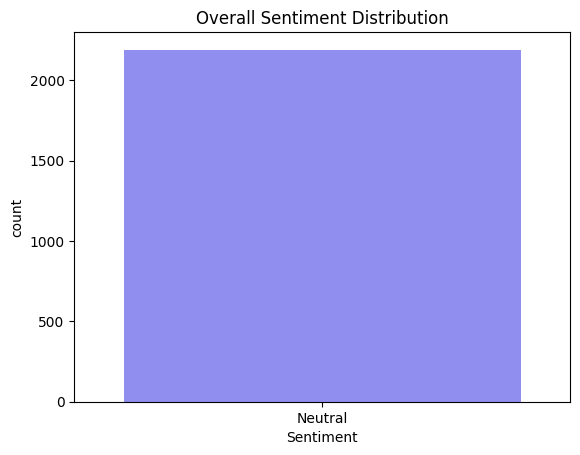

In [63]:
sns.countplot(data=df, x='Sentiment', palette='cool')
plt.title("Overall Sentiment Distribution")
plt.show()


In [66]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df.head()

Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                        message_text       date  \
0  EnronOptions Announcement\n\n\nWe have updated... 2010-05-10   
1  Marc,\n\nUnfortunately, today is not going to ... 2010-07-29   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ... 2011-07-25   
3  we were thinking papasitos (we can meet somewh... 2010-03-25   
4  Since you never gave me the $20 for the last t... 2011-05-21   

                     email                                      clean_message  \
0     sally.beck@enron.com  tsutwvutttsyusttwsttwstwtsststtsuttttytysstsyu...   
1      eric.bass@enron.com  ututytysttwtvusvstwuttsyvtttsyyssssstwttwwyutsttx   
2     sally.beck@enron.com                                      wwsyutttuswst   
3  johnny.palmer@enron.com                       wwtstswtswstyutsttusssssstut   
4  lydia.delgado@enron.com              syuvvttsttwtutxsuwuvyuttuttsuttstxstw   

  Sentiment    month  
0   Neutral  2010-05  
1   Neutral  2010-07  
2   Neutral  2011-07  
3   Neutral  2010-03  
4   Neutral  2011-05

In [69]:
Sentiment_Map = {"Positive": 1, "Negative": -1, "Neutral": 0}
df['sentiment_score'] = df['Sentiment'].map(Sentiment_Map)
df.head()

Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                        message_text       date  \
0  EnronOptions Announcement\n\n\nWe have updated... 2010-05-10   
1  Marc,\n\nUnfortunately, today is not going to ... 2010-07-29   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ... 2011-07-25   
3  we were thinking papasitos (we can meet somewh... 2010-03-25   
4  Since you never gave me the $20 for the last t... 2011-05-21   

                     email                                      clean_message  \
0     sally.beck@enron.com  tsutwvutttsyusttwsttwstwtsststtsuttttytysstsyu...   
1      eric.bass@enron.com  ututytysttwtvusvstwuttsyvtttsyyssssstwttwwyutsttx   
2     sally.beck@enron.com                                      wwsyutttuswst   
3  johnny.palmer@enron.com                       wwtstswtswstyutsttusssssstut   
4  lydia.delgado@enron.com              syuvvttsttwtutxsuwuvyuttuttsuttstxstw   

  Sentiment    month  sentiment_score  
0   Neutral  2010-05                0  
1   Neutral  2010-07                0  
2   Neutral  2011-07                0  
3   Neutral  2010-03                0  
4   Neutral  2011-05                0

In [103]:
monthly_scores = (df .groupby(['email', 'month'])['sentiment_score'].mean().reset_index())

monthly_scores.head()

email    month  sentiment_score
0  bobette.riner@ipgdirect.com  2010-01              0.0
1  bobette.riner@ipgdirect.com  2010-02              0.0
2  bobette.riner@ipgdirect.com  2010-03              0.0
3  bobette.riner@ipgdirect.com  2010-04              0.0
4  bobette.riner@ipgdirect.com  2010-05              0.0

### employee Rankings with column Rank using rank func and groupby month, sentiment_score


In [101]:

monthly_scores['Rank'] = monthly_scores.groupby('month')['sentiment_score'].rank(ascending = False)
monthly_scores.sort_values(['month', 'Rank']).head()

email    month  sentiment_score  Rank  month_num
0   bobette.riner@ipgdirect.com  2010-01              0.0   5.5        1.0
24       don.baughman@enron.com  2010-01              0.0   5.5        1.0
48          eric.bass@enron.com  2010-01              0.0   5.5        1.0
72        john.arnold@enron.com  2010-01              0.0   5.5        1.0
96      johnny.palmer@enron.com  2010-01              0.0   5.5        1.0

<function matplotlib.pyplot.show(close=None, block=None)>

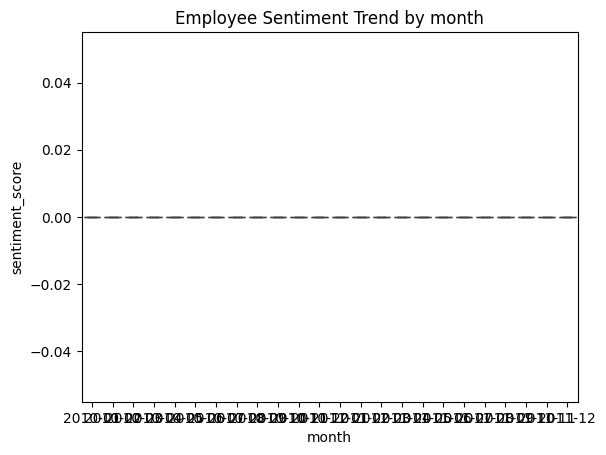

In [92]:
plt.Figure(figsize= (30,26))
sns.boxplot(data= monthly_scores, x= 'month', y='sentiment_score' )
plt.title("Employee Sentiment Trend by month")
plt.show

### As we already know that the all sentiments are neutral that's why we have not the "Negative" Sentiment

In [95]:
# negatives = df[df['Sentiment'] == 'Negative']
# flight_risk = (
#     negatives.groupby(['email', 'month'])
#     .size()
#     .reset_index(name='negative_count')
# )

# flight_risk = flight_risk[flight_risk['negative_count'] >= 4]
# flight_risk.head()


## Linear Regression Model

### Sentiment Trends Overtime

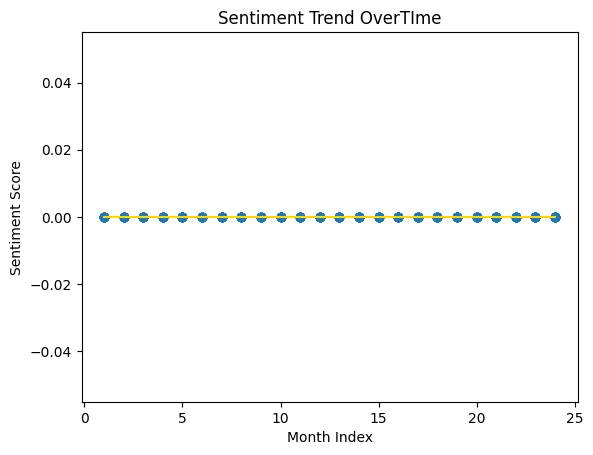

In [98]:
monthly_scores['month_num'] = monthly_scores['month'].astype(str).rank(method='dense')

X = monthly_scores[['month_num']]
y = monthly_scores['sentiment_score']

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='gold')
plt.title("Sentiment Trend OverTIme")
plt.xlabel("Month Index")
plt.ylabel("Sentiment Score")
plt.show()

In [99]:
df.to_csv("text_labeled.csv", index=False)

In [104]:
monthly_scores.to_csv("monthly_scores.csv", index=False)

In [106]:
# flight_risk.to_csv("flight_risk_employees.csv", index=False)